# Predicting Student Performance
### A Simple Linear Regression Analysis of Study Hours vs. Exam Scores
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Simple Linear Regression

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Data Loading And Preprocessing

In [2]:
# Loading the dataset to understand the data structure
data = pd.read_csv(r"C:\Users\PHOENIX\OneDrive\Desktop\GRIP\Task1 Excel.csv")
# Displaying the first few rows of the 'data' 
data.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# shape of a dataset
data.shape

(25, 2)

In [4]:
# missing values in each column of the 'data'
data.isnull().sum()

Hours    0
Score    0
dtype: int64

## Plotting Data Points on a 2-D Graph to Analyze Relationships
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage Score')

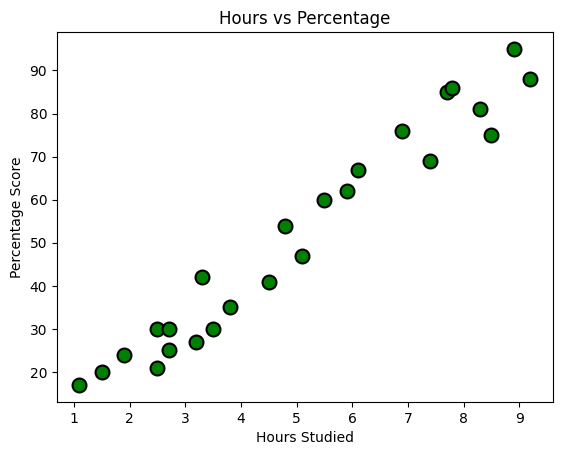

In [5]:
# plotting the distribution of scores
plt.scatter(x=data["Hours"],y=data["Score"],s=100,c="green",marker="o",edgecolors="black",linewidths=1.5)
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the Data

In [6]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

### Data Splitting: Training and Testing Sets
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.1,random_state= 2)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()

In [10]:
regressor.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Percentage Score')

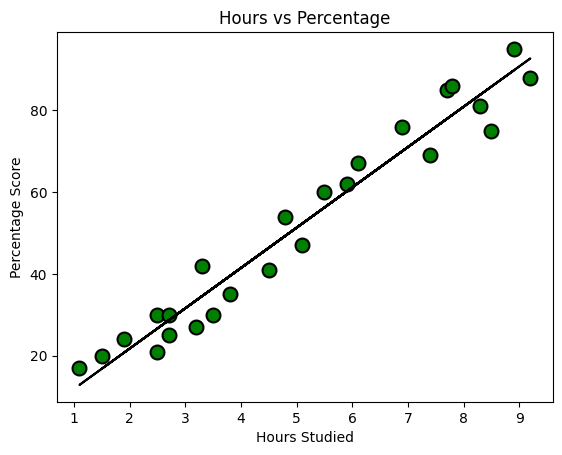

In [11]:
# Plotting the regression line
line = regressor.coef_ * x +  regressor.intercept_
# Plotting for the test data
plt.scatter(x=data["Hours"],y=data["Score"],s=100,c="green",marker="o",edgecolors="black",linewidths=1.5)
plt.plot(x, line,color = "black")
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
# Testing data
print(x_test)
# Predicting the scores
y_pred = regressor.predict(x_test)

[[1.1]
 [2.5]
 [1.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,12.856479
1,21,26.653764
2,24,20.740642


#### what will be predicted score if a student studies for 9.25hrs/day?

In [14]:
# you can also test with your own data
hours = 9.25
pred = regressor.predict([[hours]])
print(f"No of Hours:{hours}")
print(f"Predicted Score:{pred[0]}")

No of Hours:9.25
Predicted Score:93.17638805139386


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.352214336884317
